# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file. Do you improve with respect using the same number of computing cores but with **independent GA searches** ?


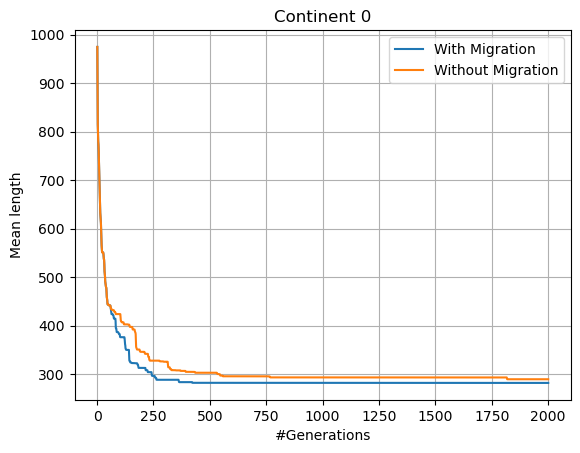

Best lenght with migration:  281.671
Best lenght without migration:  289.239


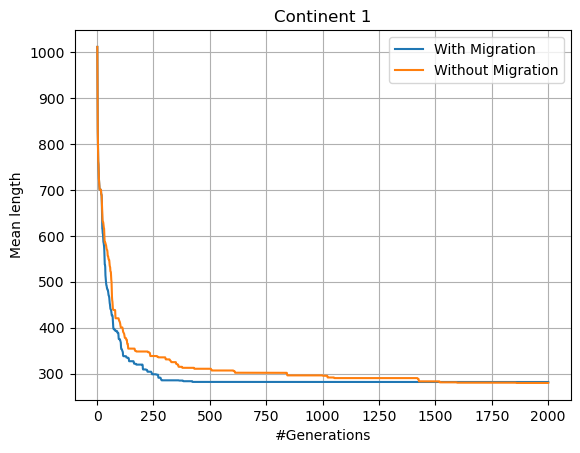

Best lenght with migration:  281.671
Best lenght without migration:  279.694


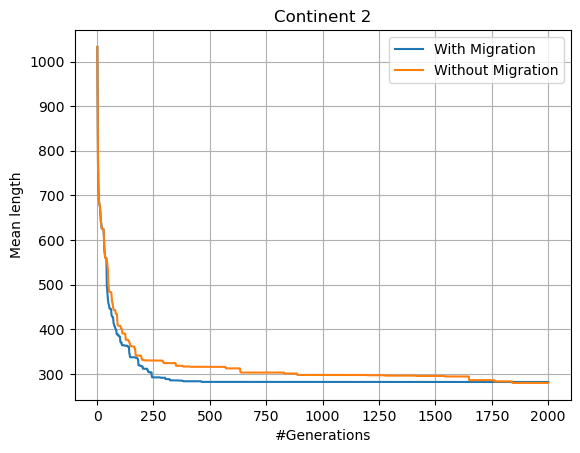

Best lenght with migration:  281.671
Best lenght without migration:  279.578


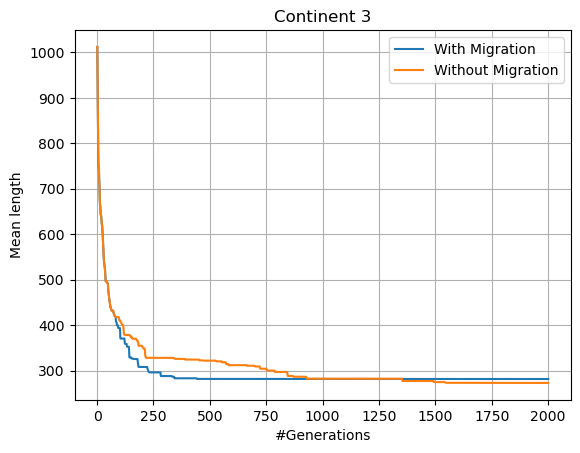

Best lenght with migration:  281.671
Best lenght without migration:  273.073


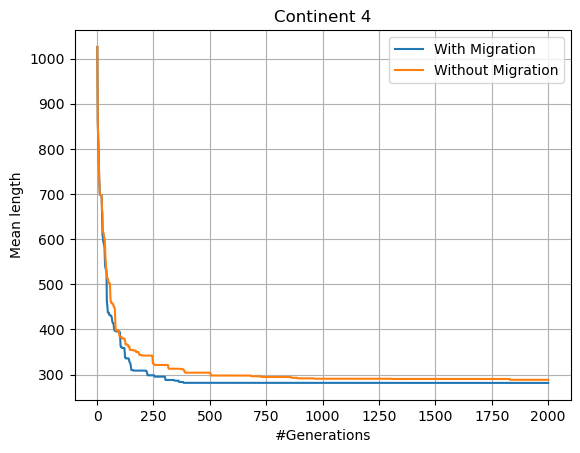

Best lenght with migration:  281.671
Best lenght without migration:  288.53


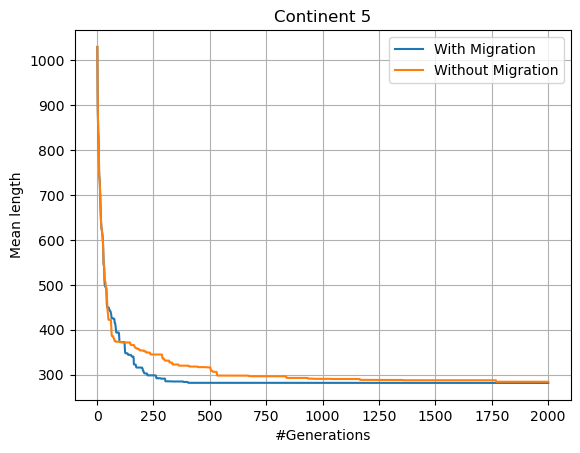

Best lenght with migration:  281.671
Best lenght without migration:  284.298


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_length(i):
    # Load data for mean length of the circle
    length_mig_data = np.loadtxt('output_lengthmean_wm_{}_.dat'.format(i))
    meanlength_mig = length_mig_data
    
    length_data = np.loadtxt('output_lengthmean_wom_{}_.dat'.format(i))
    meanlength = length_data

    # Plot mean length
    x = np.arange(1, len(meanlength) + 1)
    plt.plot(x, meanlength_mig, label='With Migration')
    plt.plot(x, meanlength, label='Without Migration')
    plt.xlabel('#Generations')
    plt.ylabel('Mean length')
    plt.title(f'Continent {i}')
    plt.grid(True)
    plt.legend()
    plt.show()
    print('Best lenght with migration: ', meanlength_mig[-1])
    print('Best lenght without migration: ', meanlength[-1])
    
ranks = 6
for i in range(ranks):
    plot_length(i)


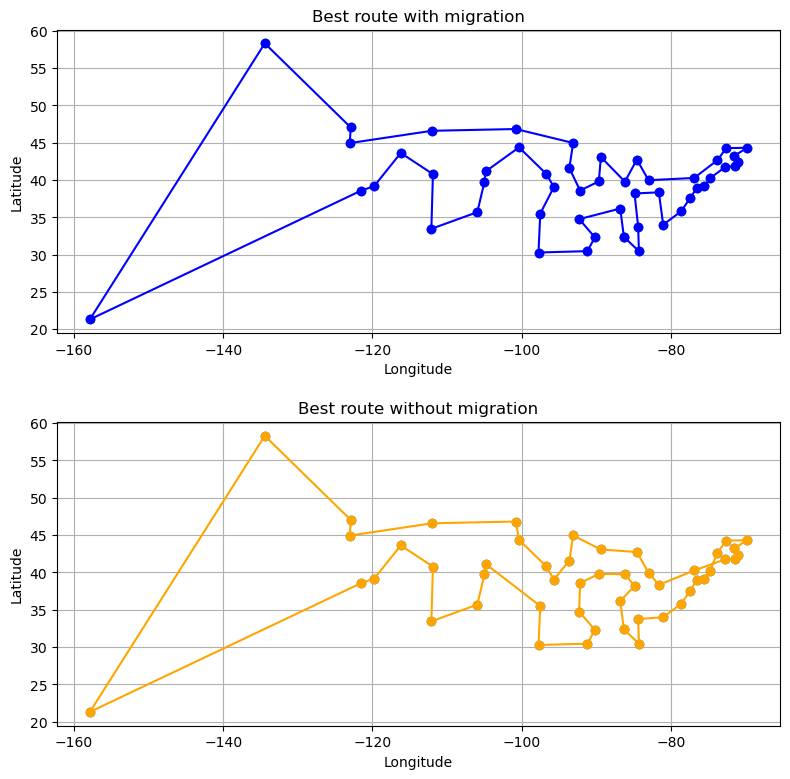

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data for square map coordinates
map_data = np.loadtxt('american_capitals.in')
x = map_data[:, 0]
y = map_data[:, 1]

# Read the route indices from file
route_data = 'route_.dat'

with open(route_data, 'r') as route_file:
    routes = route_file.readlines()

fig, axs = plt.subplots(len(routes), 1, figsize=(8, 8))

colors = ['blue', 'orange']

for i, route in enumerate(routes):
    indices = [int(index) for index in route.strip().split("  ")]

    # Create connected point pairs based on the order of indices
    connected_points = [(x[i], y[i]) for i in indices]

    # Add a line connecting the last point to the first point
    connected_points.append((x[indices[0]], y[indices[0]]))

    ax = axs[i]
    ax.set_aspect('equal')
    ax.scatter(x, y)
    ax.plot(*zip(*connected_points), '-o', color=colors[i])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    if i == 0:
        ax.set_title('Best route with migration')
    else:
        ax.set_title('Best route without migration')

    ax.grid(True)

plt.tight_layout()
plt.show()

### Comments
Parallel computing allows for the simultaneous execution of multiple tasks, enabling faster exploration and evaluation of potential routes. By dividing the workload among multiple computing units, such as CPU cores or even distributed computing nodes, we can significantly reduce the time required to find optimal solutions. This parallelization can be particularly advantageous when dealing with large population sizes or complex optimization problems.

The graph depicting the mean lengths of populations across different continents reveals that migration tends to lead to better routes compared to the continent without migration. This difference, however, becomes less significant as the number of generations increases and eventually becomes negligible around 1500 generations. It is worth noting that when the population size is low (in this case, a population of 100 for each continent), the disparity between the two methods becomes more pronounced.